# **Prediksi Algoritma Machine Learning untuk Keputusan ADM-DECS (Data Pasien Pasca Operasi)**

### Daftar Isi
* [1) Mengumpulkan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Memvalidasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Mengkonstruksi Data](#h6)
* [7) Menentukan Label Data](#h7)
* [8) Membangun Model](#h8)
* [9) Mengevaluasi Hasil Pemodelan](#h9)


# 1) Mengumpulkan Data

   Dataset yang didapat merupakan dataset tentang "Data Pasien Pasca Operasi". Data ini berjumlah 90 dengan 9 class atribut. Dengan link  dataset: https://drive.google.com/file/d/1XG0htzfbTiALnDOdCKfYmYzLBM4EDJhh/view.

Attribute Information:
1. PATIENT_NUMBER (patient's identification number)
2. L-CORE (patient's internal temperature in C): high (> 37), mid (>= 36 and <= 37), low (< 36)
3. L-SURF (patient's surface temperature in C):high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
4. L-O2 (oxygen saturation in %):O   excellent (>= 98), good (>= 90 and < 98),
fair (>= 80 and < 90), poor (< 80)
5. L-BP (last measurement of blood pressure):high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
6. SURF-STBL (stability of patient's surface temperature):stable, mod-stable, unstable
7. CORE-STBL (stability of patient's core temperature)
    stable, mod-stable, unstable
8. BP-STBL (stability of patient's blood pressure)
    stable, mod-stable, unstable
9. COMFORT (patient's perceived comfort at discharge, measured as
    an integer between 0 and 20)
10. decision ADM-DECS (discharge decision):
    I (patient sent to Intensive Care Unit),
    S (patient prepared to go home),
    A (patient sent to general hospital floor)




##Load data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#1. Load dataset
dataset=pd.read_csv("post-operative-new.data")

# 2) Menelaah data

In [ ]:
#Menampilkan dataset
dataset

,0,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
0,1,mid,high,excellent,high,stable,stable,stable,10,S
1,2,high,low,excellent,high,stable,stable,mod-stable,10,A
2,3,mid,low,good,high,stable,unstable,mod-stable,15,A
3,4,mid,mid,excellent,high,stable,stable,stable,10,A
4,5,high,low,good,mid,NaN,stable,unstable,15,S
...,...,...,...,...,...,...,...,...,...,...
84,85,mid,mid,excellent,mid,unstable,stable,stable,10,A
85,86,mid,mid,excellent,mid,unstable,stable,stable,NaN,S
86,87,mid,mid,good,mid,unstable,stable,stable,15,A
87,88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [ ]:
#2. Memasukan nama fitur dari setiap kolom
dataset.columns=["Patient_Number","L_Core","L_SURF","L_O2","L_BP","SUR_STBL","CORE_STBL","BP_STBL","COMFORT","decison_ADM_DECS"]

In [ ]:
#Menampilkan dataset teratas
dataset.head()

,Patient_Number,L_Core,L_SURF,L_O2,L_BP,SUR_STBL,CORE_STBL,BP_STBL,COMFORT,decison_ADM_DECS
0,1,mid,high,excellent,high,stable,stable,stable,10,S
1,2,high,low,excellent,high,stable,stable,mod-stable,10,A
2,3,mid,low,good,high,stable,unstable,mod-stable,15,A
3,4,mid,mid,excellent,high,stable,stable,stable,10,A
4,5,high,low,good,mid,NaN,stable,unstable,15,S


In [ ]:
#Menampilkan data terbawah dari kolom
dataset.tail()

,Patient_Number,L_Core,L_SURF,L_O2,L_BP,SUR_STBL,CORE_STBL,BP_STBL,COMFORT,decison_ADM_DECS
84,85,mid,mid,excellent,mid,unstable,stable,stable,10,A
85,86,mid,mid,excellent,mid,unstable,stable,stable,NaN,S
86,87,mid,mid,good,mid,unstable,stable,stable,15,A
87,88,mid,mid,excellent,mid,unstable,stable,stable,10,A
88,89,mid,mid,good,mid,unstable,stable,stable,15,S


In [ ]:
#menampilkan info baik itu nama setiap kolom, tipe data, jumlah data dalam tiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_Number    89 non-null     int64 
 1   L_Core            89 non-null     object
 2   L_SURF            89 non-null     object
 3   L_O2              80 non-null     object
 4   L_BP              89 non-null     object
 5   SUR_STBL          80 non-null     object
 6   CORE_STBL         89 non-null     object
 7   BP_STBL           89 non-null     object
 8   COMFORT           80 non-null     object
 9   decison_ADM_DECS  88 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.1+ KB


In [ ]:
#Mendefinisikan kolom kategorikal
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']

In [ ]:
# Tampilkan nilai-nilai unik yang ada pada setiap kolom kategori dalam dataset
for col in cat_cols:
    print(f"{col} has {dataset[col].unique()} values\n")

L_Core has ['mid' 'high' 'low'] values

L_SURF has ['high' 'low' 'mid'] values

L_O2 has ['excellent' 'good' nan] values

L_BP has ['high' 'mid' 'low'] values

SUR_STBL has ['stable' nan 'unstable'] values

CORE_STBL has ['stable' 'unstable' 'mod-stable'] values

BP_STBL has ['stable' 'mod-stable' 'unstable'] values

COMFORT has ['10' '15' '05' nan '07' '?'] values

decison_ADM_DECS has ['S' 'A' 'A ' nan 'I'] values



# 3) Memvalidasi data

In [ ]:
#Menampilkan data yang duplikat
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
84,False
85,False
86,False
87,False


In [ ]:
#mengecek jumlah duplikat
dataset.duplicated().sum()

0

In [ ]:
#3. mengecek missing value
dataset.isnull().sum()

,0
Patient_Number,0
L_Core,0
L_SURF,0
L_O2,9
L_BP,0
SUR_STBL,9
CORE_STBL,0
BP_STBL,0
COMFORT,9
decison_ADM_DECS,1


# 4) Menentukan Objek

In [ ]:
#Menghapus kolom nomor pasien
data_drop= dataset.drop(columns=['Patient_Number'])

In [ ]:
#Menampilkan info kolom setelah kolom nomor pasien dihapus
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   L_Core            89 non-null     object
 1   L_SURF            89 non-null     object
 2   L_O2              80 non-null     object
 3   L_BP              89 non-null     object
 4   SUR_STBL          80 non-null     object
 5   CORE_STBL         89 non-null     object
 6   BP_STBL           89 non-null     object
 7   COMFORT           80 non-null     object
 8   decison_ADM_DECS  88 non-null     object
dtypes: object(9)
memory usage: 6.4+ KB


In [ ]:
#Menampilkan 5 kolom teratas
data_drop.head(5)

,L_Core,L_SURF,L_O2,L_BP,SUR_STBL,CORE_STBL,BP_STBL,COMFORT,decison_ADM_DECS
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,NaN,stable,unstable,15,S


# 5) Membersihkan  Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#4. Mengubah data format data
#Menghapus spasi di awal dan akhir
dataset["decison_ADM_DECS"] = dataset["decison_ADM_DECS"].str.strip()
dataset["decison_ADM_DECS"]

,decison_ADM_DECS
0,S
1,A
2,A
3,A
4,S
...,...
84,A
85,S
86,A
87,A


In [ ]:
#5. menghapus data kosong dengan mengisinya dengan data modus karena data katogorikal
data_clean = data_drop.fillna(data_drop.mode().iloc[0])

In [ ]:
#8. Mengubah data kategorikal menjadi numerik
#Membuat objek
le= LabelEncoder()

#Mengubah data yang bersifat kategorikal (object) menjadi data numerik
for col in cat_cols:
  data_clean[col]=le.fit_transform(data_clean[col])

In [ ]:
#memeriksa hasil encoding dengan
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   L_Core            89 non-null     int64
 1   L_SURF            89 non-null     int64
 2   L_O2              89 non-null     int64
 3   L_BP              89 non-null     int64
 4   SUR_STBL          89 non-null     int64
 5   CORE_STBL         89 non-null     int64
 6   BP_STBL           89 non-null     int64
 7   COMFORT           89 non-null     int64
 8   decison_ADM_DECS  89 non-null     int64
dtypes: int64(9)
memory usage: 6.4 KB


In [ ]:
#6. Mengecek data duplicates
data_clean.duplicated().sum()

12

In [ ]:
data_clean=data_clean.drop_duplicates()

# 6) Mengkontruksi data

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   L_Core            77 non-null     int64
 1   L_SURF            77 non-null     int64
 2   L_O2              77 non-null     int64
 3   L_BP              77 non-null     int64
 4   SUR_STBL          77 non-null     int64
 5   CORE_STBL         77 non-null     int64
 6   BP_STBL           77 non-null     int64
 7   COMFORT           77 non-null     int64
 8   decison_ADM_DECS  77 non-null     int64
dtypes: int64(9)
memory usage: 6.0 KB


In [ ]:
# Untuk menampilkan statistik data
data_clean.describe()

,L_Core,L_SURF,L_O2,L_BP,SUR_STBL,CORE_STBL,BP_STBL,COMFORT,decison_ADM_DECS
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.441558,1.285714,0.623377,1.259740,0.454545,1.064935,1.038961,2.207792,0.649351
std,0.769373,0.792351,0.487717,0.951489,0.501195,0.296367,0.733441,0.655697,0.928585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,4.000000,2.000000


Memvisualisasikan masing-masing data dengan menggunakan histogram

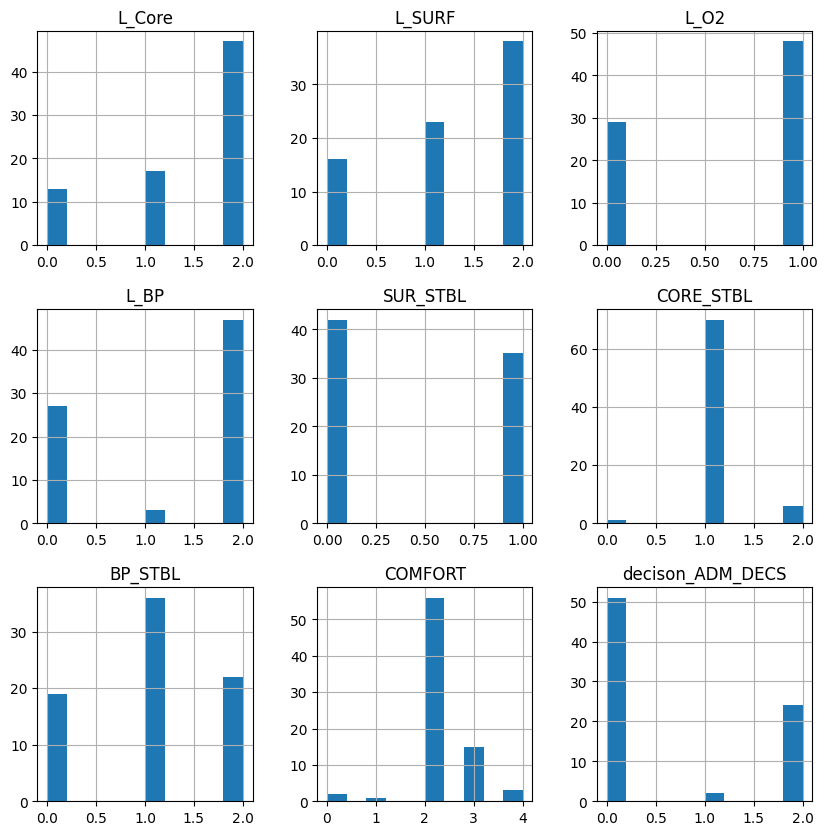

In [ ]:
#7. Menampilkan distribusi data dengan diagram batang
data_hist=data_clean.hist(figsize=(10,10))

<Axes: >

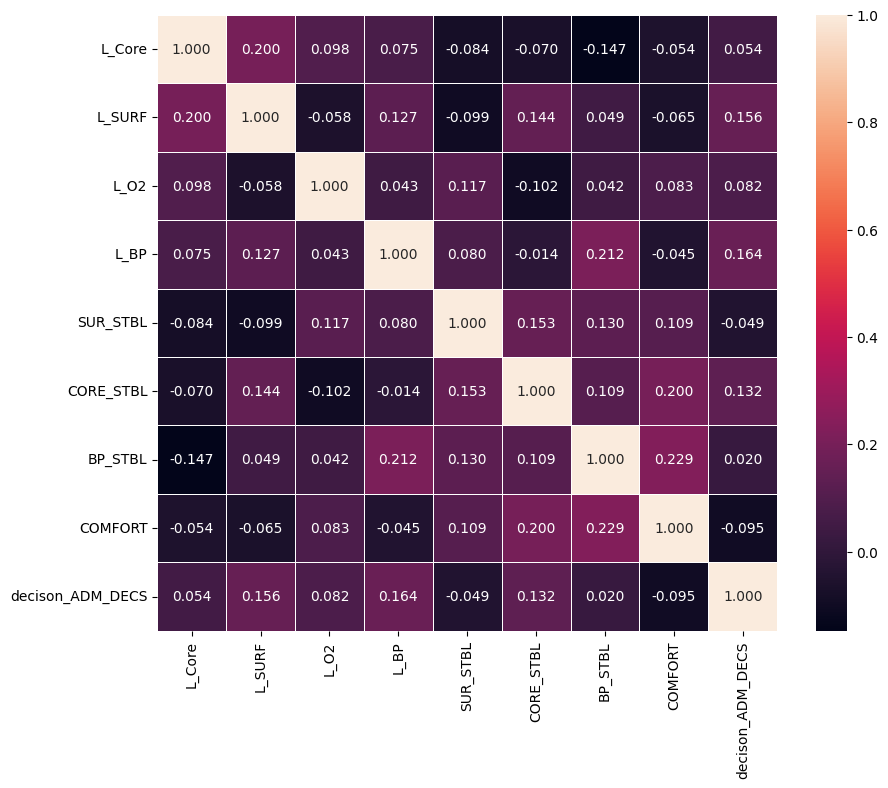

In [ ]:
#9. Menampilkan korelasi dengan heatmap
corr_mat =data_clean.corr()
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr_mat,annot=True, linewidth=0.5, fmt=".3f")

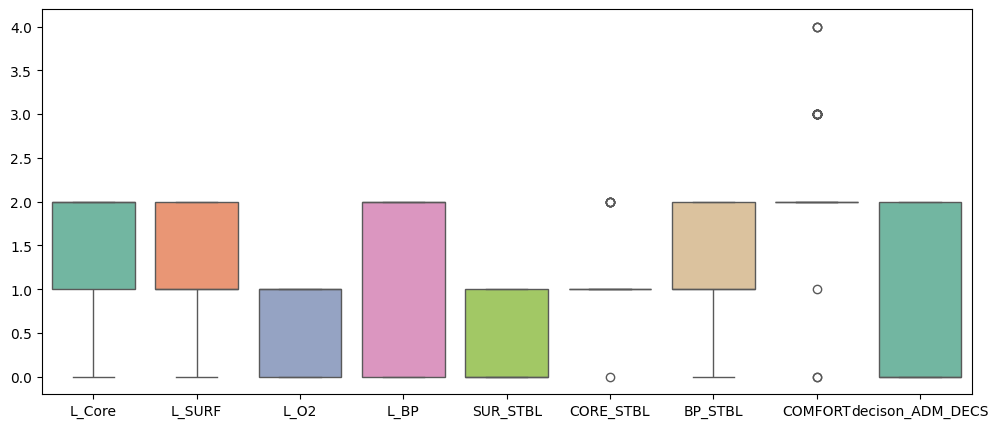

In [ ]:
#Memvisualisasikan data untuk melihat outlayer
plt.figure(figsize=(12,5))
sns.boxplot(data=data_clean, orient='v',palette="Set2")
plt.title("",fontsize=14)
plt.show()

# 7) Menentukan Label

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
# 10. Memisahkan kolom target dan features
X=data_clean.drop("decison_ADM_DECS", axis=1)
y=data_clean["decison_ADM_DECS"]

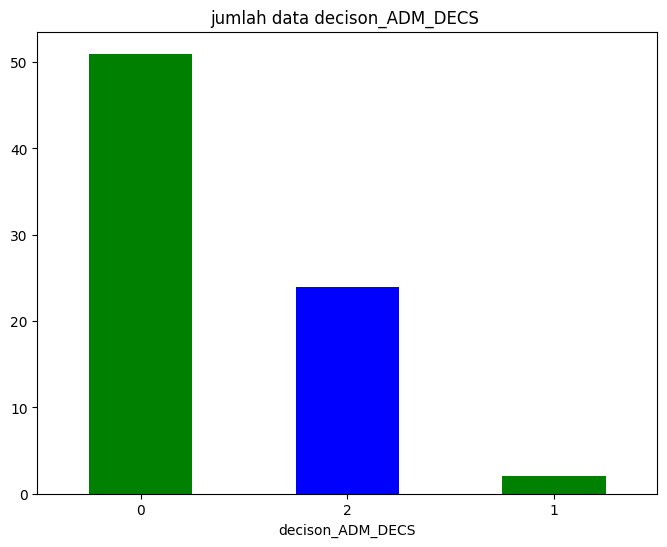

In [ ]:
#membuat visualisasi untuk kelas target yang akan digunakan
data_clean['decison_ADM_DECS'].value_counts().plot(kind='bar',figsize=(8,6),color=['green','blue'])
plt.title("jumlah data decison_ADM_DECS ")
plt.xticks(rotation=0);

In [ ]:
#12. Menormalisasikan data yang imblance
smote= SMOTE(random_state=42,k_neighbors=1)
X_smote,y_smote=smote.fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


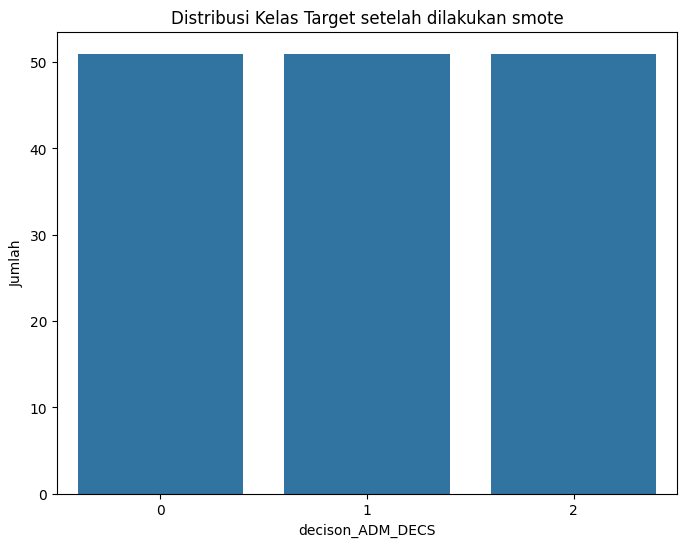

In [ ]:
# Visualisasi setelah SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote)
plt.title('Distribusi Kelas Target setelah dilakukan smote')
plt.ylabel('Jumlah')

plt.show()

In [ ]:
#11. Melakukan pembagian data
X_train, X_test,y_train,y_test= train_test_split(X_smote,y_smote, test_size=0.3,random_state=0,stratify=y_smote)

# 8) Membangun Model

In [ ]:
#13. import library  decison tree
from sklearn.tree import DecisionTreeClassifier
#13. Randomsearch
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#latih model dengan data train
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

# 9) Mengevaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
y_pred=clf.predict(X_test)

print("accuracy: ")
print(accuracy_score(y_pred,y_test))

print("\n classification report")
print(classification_report(y_pred,y_test))

accuracy: 
0.782608695652174

 classification report
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.93      0.93      0.93        15
           2       0.87      0.65      0.74        20

    accuracy                           0.78        46
   macro avg       0.79      0.80      0.78        46
weighted avg       0.82      0.78      0.79        46



15. Berdasarkan hasil pemodelan diatas dapat disumpulkan bahwa akurasi yang didapat itu 78%, presisi 82%, recall 78, dan f1-score 79%

**confusion Matrix**

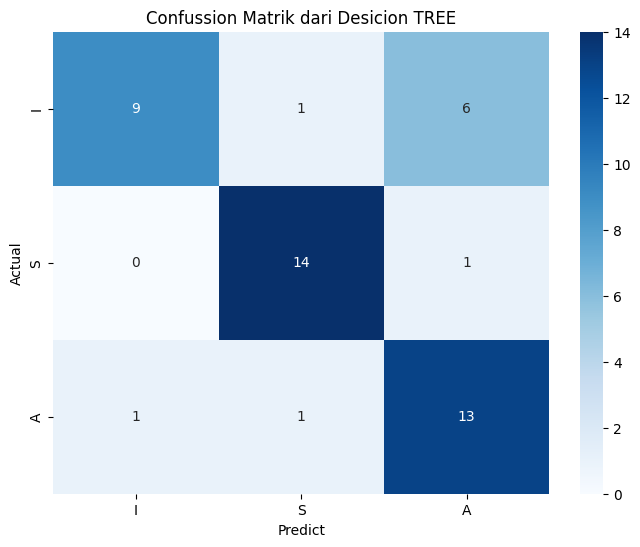

In [ ]:
#Melakukan visualisasi untuk menampilkan confussion matrik
cm_clf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_clf,annot=True, fmt="d",cmap="Blues",
             xticklabels=["I","S","A"],
             yticklabels=["I","S","A"])
plt.title("Confussion Matrik dari Desicion TREE")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()



keterangan :
*  I (pasien dikirim ke Unit Perawatan Intensif)
*  S (pasien bersiap pulang),
*  A (pasien dikirim ke lantai rumah sakit umum)

14. Berdasarkan hasil confusion matrix di atas, dapat disimpulkan:
* Model mampu memprediksi kelas I yang sebenarnya sebanyak 9 kali. Namun, model memprediksi kelas I sebagai A sebanyak 1 kali dan sebagai S sebanyak 0 kali.
* Model memprediksi kelas S yang sebenarnya sebanyak 14 kali. Namun, model memprediksi kelas S sebagai A sebanyak 1 kali dan sebagai I sebanyak 1 kali.
* Model memprediksi kelas A yang sebenarnya sebanyak 13 kali. Namun, model memprediksi kelas A sebagai S sebanyak 1 kali dan sebagai I sebanyak 6 kali.

**Random Search**

In [ ]:
param_grid={
    'criterion':['gini'], #Menentukan fungsi untuk mengukur kualitas pemisahan dari setiap  node
    'max_depth':[10,20,30], # jedalaman dalam mengambil keputusan
    'min_samples_split':[2,5,10], #jumlah minumum sampel yang perlu dibagi pda node
    'min_samples_leaf':[1,2,3] # jumlah sempel pada daun
}

In [ ]:
dt_rv = RandomizedSearchCV(clf,param_grid, verbose=2, n_jobs=-1)

In [ ]:
dt_rv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 10]},
                   verbose=2)

In [ ]:
y_pred_rv =dt_rv.predict(X_test)
print("accuracy: ")
print(accuracy_score(y_pred_rv,y_test))


accuracy: 
0.7608695652173914
